# Proportion of shared $\beta$ sequences

The two files "../Datas/exp3/sequences_alpha.tsv.gz" et "../Datas/exp3/sequences_beta.tsv.gz" are too big to be included in the dropbox. We give "smaller versions", which only contains the subset of alpha and beta paired with more than twice different sequence. To obtain the complete figure, the full code should be run, with the dataset of the Howie paper, to generate these two files.

In [1]:
# Experiment selection : 
experiment="exp3"

In [14]:
from __future__ import division, print_function
from IPython.display import display, HTML, Math, Latex
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log, sqrt, factorial
from scipy import stats, optimize

filepairsab = "../Datas/"+experiment+"/pairs_ab.tsv.gz"
filepairsaa = "../Datas/"+experiment+"/pairs_aa.tsv.gz"
filepairsbb = "../Datas/"+experiment+"/pairs_bb.tsv.gz"

# WARNING: only load alpha (resp. beta) sequences with at least 
# two beta paired (resp. alpha) (for space reasons)
# can be replaced by sequences_alpha.tsv.gz (resp. sequence_beta.tsv.gz)
# if the full code has been ran. 

filea = "../Datas/"+experiment+"/sequences_alpha.tsv.gz" 
fileb = "../Datas/"+experiment+"/sequences_beta.tsv.gz" 

## remove if the full files were generated
filea = "../Datas/"+experiment+"/sequences_alpha_2b.tsv.gz" 
fileb = "../Datas/"+experiment+"/sequences_beta_2a.tsv.gz" 

In [15]:
dfb = pd.read_csv(fileb, sep="\t")
dfa = pd.read_csv(filea, sep="\t")
print(len(dfa), len(dfb))
Na = 1585019 # can be replaced by len(dfa)
Nb = 726801  # can be replaced by len(dfb)

1585019 726801


In [16]:
dfb["nb_paired_alphas"] = dfb.paired_alphas.apply(lambda x: (0 if x != x else len(str(x).split(","))))
dfb["nb_paired_betas"] = dfb.paired_betas.apply(lambda x: (0 if x != x else len(str(x).split(","))))
dfa["nb_paired_alphas"] = dfa.paired_alphas.apply(lambda x: (0 if x != x else len(str(x).split(","))))
dfa["nb_paired_betas"] = dfa.paired_betas.apply(lambda x: (0 if x != x else len(str(x).split(","))))

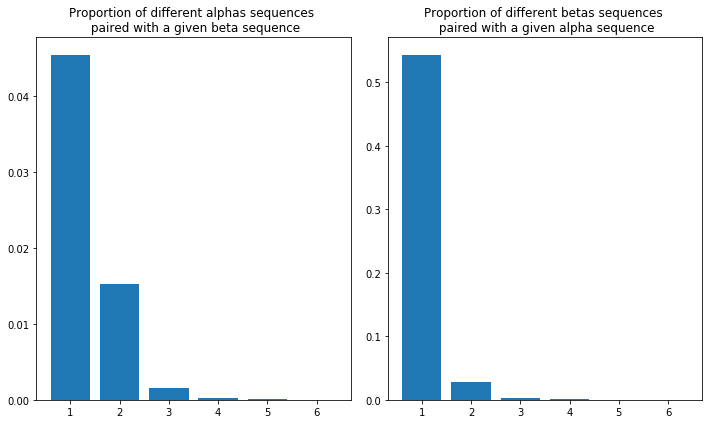

In [17]:
dfbrestr = dfb[(dfb.nb_paired_alphas >= 1) | (dfb.nb_paired_betas >= 1)]
dfarestr = dfa[(dfa.nb_paired_betas >= 1) | (dfb.nb_paired_alphas >= 1)]

fig, axes = plt.subplots(ncols=2, figsize=(10,6))
ax0, ax1 = axes.flatten()

dctb = dfbrestr.nb_paired_alphas.value_counts()
dcta = dfarestr.nb_paired_betas.value_counts()

tot_b = sum(dctb)
tot_a = sum(dcta)
rge = range(1,7)
ax0.bar(rge, [dctb[u]/Na for u in rge])
ax1.bar(rge, [dcta[u]/tot_a for u in rge])
ax1.set_title("Proportion of different betas sequences \n paired with a given alpha sequence")
ax0.set_title("Proportion of different alphas sequences \n paired with a given beta sequence")
plt.tight_layout()
# ax0.set_ylim((0,0.3))
# ax1.set_ylim((0,0.3))
plt.savefig("coactivation_cell_sharing_a_chain_1.pdf")
plt.show()